In [1]:
import sys
sys.path.append('../src')

from audio_classifier import AudioClassifier
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
classifier = AudioClassifier(data_path="../data/features/audio_features.csv") 
classifier.load_data()

In [3]:
classifier.preprocess_data()

In [4]:
config = {"lstm_units": 128, "dropout_rate": 0.2, "dense_units": 32, "num_dense_layers": 2}

classifier.build_model(**config)
classifier.train_model(epochs=50, batch_size=32)

Epoch 1/50


C:\Users\redh0\PycharmProjects\MusicMind\.venv\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.5804 - loss: 1.0445 - val_accuracy: 0.8611 - val_loss: 0.5061
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.8596 - loss: 0.4611 - val_accuracy: 0.9028 - val_loss: 0.3645
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.8975 - loss: 0.3084 - val_accuracy: 0.9097 - val_loss: 0.3055
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9585 - loss: 0.1856 - val_accuracy: 0.9028 - val_loss: 0.2672
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9552 - loss: 0.1468 - val_accuracy: 0.9028 - val_loss: 0.2374
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9683 - loss: 0.1135 - val_accuracy: 0.9167 - val_loss: 0.2142
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9667 - loss: 0.1184 - val_accuracy: 0.9167 - val_loss: 0.1996
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9643 - loss: 0.0947 - val_accuracy: 0.9306 - val_loss: 0.

In [5]:
loss, accuracy = classifier.evaluate_model()
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9682 - loss: 0.1577 
Test Loss: 0.1600
Test Accuracy: 0.9722


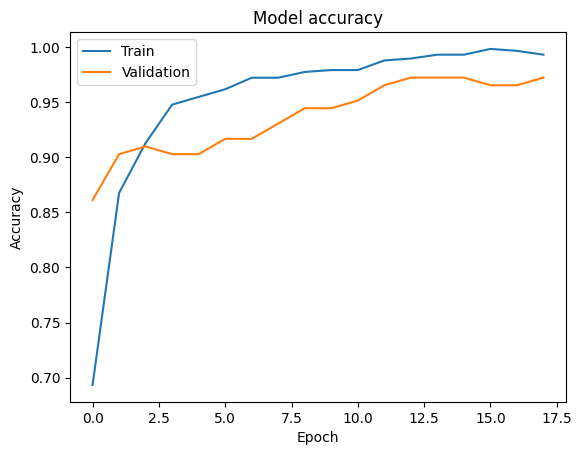

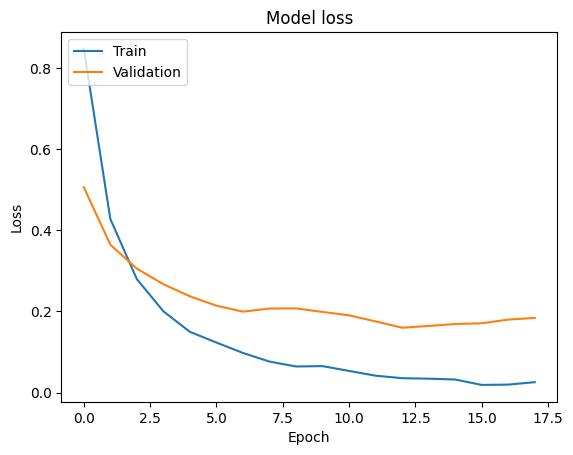

In [6]:
plt.plot(classifier.history.history['accuracy'])
plt.plot(classifier.history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(classifier.history.history['loss'])

plt.plot(classifier.history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')

plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [7]:
classifier.save_model()

Modèle enregistré avec succès dans ../data/models\audio_classifier_model.h5
